In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.linalg as scl
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from pylab import plt, mpl
from sklearn.linear_model import Ridge, Lasso
from sklearn.utils import resample
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import math
import seaborn as sns
from sklearn.model_selection import validation_curve
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import learning_curve, ShuffleSplit

In [2]:
# def polyfit(train,test,target,target_test,degree,R,interaction_only):
#     poly = PolynomialFeatures(degree,interaction_only)
#     X1_train=poly.fit_transform(train)
#     X1_test=poly.fit_transform(test)
#     R.fit(X1_train, target)
#     ypredictR = R.predict(X1_train)
#     ypredictRtest = R.predict(X1_test)
#     return ypredictR,ypredictRtest

# Displays the output features for a given threshold value of correlation
def getCorrelatedFeature(corr_data, threshold):
#     Store the features and the correlation values which are above the threshold
    feature = []
    value = []
    
    for i, index in enumerate(corr_data.index):
        
        if abs(corr_data[index])> threshold:
            feature.append(index)
            value.append(corr_data[index])

#     print(corr_data.index)        
    df = pd.DataFrame(data = value, index = feature, columns=['Correlation Value'])
    return df, feature

# provides a fit and the prediction for the chosen features
def get_y_predict(correlated_data,degree):
    #Drop target Label
    X = correlated_data.drop(labels = ['MEDV'], axis = 1).to_numpy()
    #Define Target
    y = correlated_data['MEDV'].to_numpy()
    print(X.shape,y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #scaler = RobustScaler()
    # scaler = MinMaxScaler()
    scaler = StandardScaler()                   #check scaling effect
    poly = PolynomialFeatures(degree,include_bias=False)
    #define Design Matrix
    X1_train=poly.fit_transform(X_train)
    X1_test=poly.fit_transform(X_test)
    #define Model and Fit
    model = LinearRegression()
    model.fit(X1_train, y_train)
    y_predictTest = model.predict(X1_test)
    return y_test, y_predictTest

# Provides the accuracy of our model
total_features = []
features_name = []
final_correlation_value = []
r2_scores = []
mse_value = []
#   for a given model this function displays the R2 score, the mean squared error and the features used for the prediction
def performance_metrics(features, threshold, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    total_features.append(len(features)-1)
    features_name.append(str(features))
    final_correlation_value.append(threshold)
    r2_scores.append(score)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [features_name, total_features, final_correlation_value, r2_scores, mse_value],
                                    index = ['features name', '#features', 'Threshold', 'R2_score', 'MSE'])
#     display(metrics_dataframe)
    return metrics_dataframe.T
#ccalculate cross validation
def get_y_predictkf(correlated_data,degree,fold):
    X = correlated_data.drop(labels = ['MEDV'], axis = 1).to_numpy()
    y = correlated_data['MEDV'].to_numpy()
    print(X.shape,y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #scaler = RobustScaler()
    
    # scaler = MinMaxScaler()
    scaler = StandardScaler()
    scaler.fit(X_train)
    poly = PolynomialFeatures(degree,include_bias=False)
    X1_train=poly.fit_transform(X_train)
    X1_test=poly.fit_transform(X_test)
    print(X1_train.shape)
    X2=poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X1_train, y_train)
    y_predictTest = model.predict(X1_test)
    
    estimated_mse_folds = cross_val_score(model, X2, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=fold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse = np.mean(-estimated_mse_folds)
#     ypredictTrain, y_predictTest = polyfit(X_train,X_test,Y_train,Y_test,3,LinearRegression(),True)
    return y_test, y_predictTest, estimated_mse

def performance_metricskf(features, threshold, y_true, y_pred,mse_kfold):
    score = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    total_features.append(len(features)-1)
    features_name.append(str(features))
    final_correlation_value.append(threshold)
    r2_scores.append(score)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [features_name, total_features, final_correlation_value, r2_scores, mse_value,mse_kfold],
                                    index = ['features name', '#feature', 'Threshold', 'R2_score', 'MSE','KFOLD'])
#     display(metrics_dataframe)
    return metrics_dataframe.T

#perform ridge regression using scikit-learn
def get_y_predictkf_ridge(correlated_data,degree,fold,alpha):
    X = correlated_data.drop(labels = ['MEDV'], axis = 1).to_numpy()
    y = correlated_data['MEDV'].to_numpy()
    print(X.shape,y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #scaler = RobustScaler()
    
    # scaler = MinMaxScaler()
    scaler = StandardScaler()
    scaler.fit(X_train)
    poly = PolynomialFeatures(degree,include_bias=False)
    X1_train=poly.fit_transform(X_train)
    X1_test=poly.fit_transform(X_test)
    print(X1_train.shape)
    X2=poly.fit_transform(X)
    model = Ridge(alpha)
    model.fit(X1_train, y_train)
    y_predictTest = model.predict(X1_test)
    
    estimated_mse_folds = cross_val_score(model, X2, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=fold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse = np.mean(-estimated_mse_folds)
#     ypredictTrain, y_predictTest = polyfit(X_train,X_test,Y_train,Y_test,3,LinearRegression(),True)
    return y_test, y_predictTest, estimated_mse

def ols_svd(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    u, s, v = scl.svd(x)
    return v.T @ scl.pinv(scl.diagsvd(s, u.shape[0], v.shape[0])) @ u.T @ y



def get_y_predictkf_psinv(correlated_data,degree,fold,alpha):
    X = correlated_data.drop(labels = ['MEDV'], axis = 1).to_numpy()
    y = correlated_data['MEDV'].to_numpy()
    print(X.shape,y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #scaler = RobustScaler()
    
    scaler = MinMaxScaler()
    #scaler = StandardScaler()
    scaler.fit(X_train)
    poly = PolynomialFeatures(degree,include_bias=False)
    X1_train=poly.fit_transform(X_train)
    X1_test=poly.fit_transform(X_test)
    print(X1_test.shape)
   
    #beta = np.linalg.inv(X1_train.T @ X1_train) @ X1_train.T @ y_train
    beta = X1_train.T @ (np.linalg.inv(X1_train @ X1_train.T)) @ y_train
   # beta=beta.reshape(-1)
    print(beta.shape)
    y_predictTest= X1_test @ beta
    model = Ridge(alpha)
    X2=poly.fit_transform(X)
    estimated_mse_folds = cross_val_score(model, X2, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=fold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse = np.mean(-estimated_mse_folds)
#     ypredictTrain, y_predictTest = polyfit(X_train,X_test,Y_train,Y_test,3,LinearRegression(),True)
    return y_test, y_predictTest, estimated_mse

#ridge regression with explicit equation
def get_y_predictkf_ridge_d(correlated_data,degree,fold,alpha):
    X = correlated_data.drop(labels = ['MEDV'], axis = 1).to_numpy()
    y = correlated_data['MEDV'].to_numpy()
    print(X.shape,y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    scaler = RobustScaler()
    
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    scaler.fit(X_train)
    poly = PolynomialFeatures(degree,include_bias=False)
    X1_train=poly.fit_transform(X_train)
    X1_test=poly.fit_transform(X_test)
    print(X1_test.shape)
    #I=np.identity(len(X1_train.T @ X1_train))
    I=np.identity(len(X1_train @ X1_train.T))
    #beta = np.linalg.inv(X1_train.T @ X1_train + alpha*I) @ X1_train.T @ y_train
    beta = X1_train.T @ np.linalg.inv(X1_train @ X1_train.T + alpha*I) @ y_train
   # beta=beta.reshape(-1)
    print(beta.shape)
    y_predictTest= X1_test @ beta
    model = Ridge(alpha)
    X2=poly.fit_transform(X)
    estimated_mse_folds = cross_val_score(model, X2, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=fold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse = np.mean(-estimated_mse_folds)
#     ypredictTrain, y_predictTest = polyfit(X_train,X_test,Y_train,Y_test,3,LinearRegression(),True)
    return y_test, y_predictTest, estimated_mse

In [3]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# Checking the containing elements
boston_dataset.keys()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(boston)
boston['MEDV'] = boston_dataset.target
# display(boston)
# Check for the number of missing artibutes for each feature
boston.info()
boston.isnull().sum()
# Check for features with low variance 
boston.var()

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64

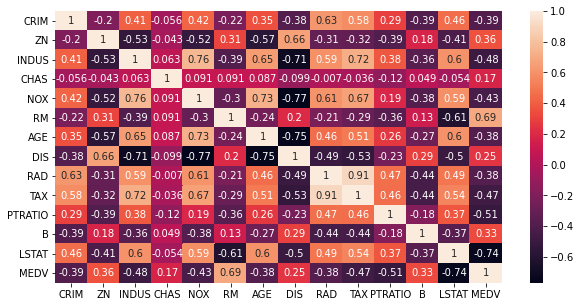

In [4]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(3)
# use the heatmap function from seaborn to plot the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
# correlation_matrix.index.values
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


In [11]:
# the threshold value corresponds to the correlation value
threshold = 0
# Obtain predictions for different threshold
for i in range(8):
    k = i
    threshold = k/10
    
#   calls the getCorrelatedFeatures function to select the features with coreelation values above the threshold
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
    # high correlation among 'RAD' and 'TAX' check effect of removing
    # if 'RAD' in correlated_data.columns:
    #    correlated_data = correlated_data.drop(labels = ['RAD'], axis = 1)
    #if 'TAX' in correlated_data.columns:
    #    correlated_data = correlated_data.drop(labels = ['TAX'], axis = 1)
    degree = 2                                            #check for polynomial order 2
    y_test, y_predict = get_y_predict(correlated_data,degree)
    
#   calls the performance_metrics function to display the accuracy of the model    

performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)    

(506, 13) (506,)
(506, 13) (506,)
(506, 12) (506,)
(506, 11) (506,)
(506, 6) (506,)
(506, 3) (506,)
(506, 2) (506,)
(506, 1) (506,)


,features name,#features,Threshold,R2_score,MSE
0,['LSTAT' 'MEDV'],1,0.7,0.626873,27.3628
1,['LSTAT' 'MEDV'],1,0.7,0.626873,27.3628


In [12]:
maxdegree = 7
mse_arr=np.zeros(maxdegree)
index=np.zeros(maxdegree)
r2sc=np.zeros(maxdegree)
threshold = 0.0                  #selected all parameters
# loop over different order polynomials
for i in range(maxdegree):
    
   #Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
    #correlated_data = correlated_data.drop(labels = ['RAD'], axis = 1)
    #correlated_data = correlated_data.drop(labels = ['TAX'], axis = 1)
    degree = i+1
    index[i]=i+1
   #Call fit function again
    y_test, y_predict = get_y_predict(correlated_data,degree)
   #Calculate the cost function
    mse_arr[i]= mean_squared_error(y_test, y_predict)
    r2s=r2_score(y_test, y_predict)
    r2sc[i]=r2s

(506, 13) (506,)
(506, 13) (506,)
(506, 13) (506,)
(506, 13) (506,)
(506, 13) (506,)
(506, 13) (506,)
(506, 13) (506,)


Text(0.5, 1.0, 'Linear Regression fit')

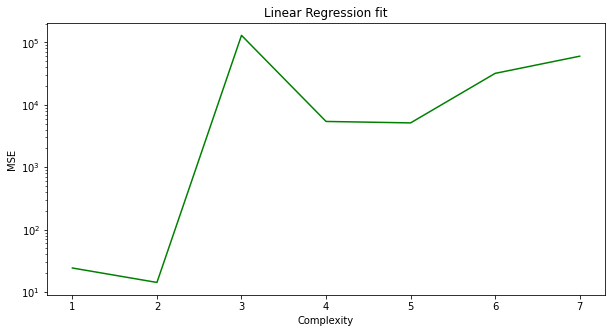

In [13]:
#plot MSE as a function of the complexity
plt.plot(index,mse_arr,'g-')
plt.yscale('log')
plt.xlabel('Complexity')
plt.ylabel('MSE')
plt.title('Linear Regression fit')

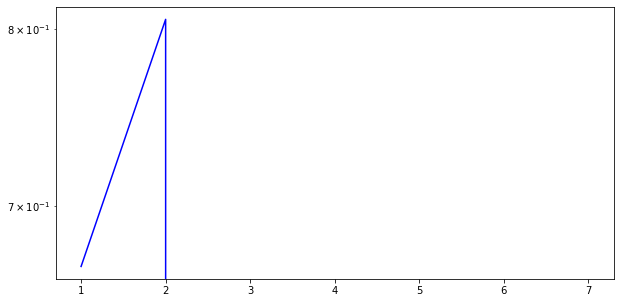

In [10]:
#plot R2Score as a function of the complexity
plt.plot(index,r2sc,'b-')
plt.yscale('log')

In [16]:
#aplication of Cross Validation
maxdegree = 4
folds=5
mse_arr=np.zeros(maxdegree)
index=np.zeros(maxdegree)
threshold = 0.0
# Obtain models for different threshold
for i in range(maxdegree):
    #k = i + 3
    #threshold = k/10
#     Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
   # print(correlated_data)
    degree = i+1
    index[i]=i+1
    y_test, y_predict,mse_kf = get_y_predictkf(correlated_data,degree,folds)
    mse_arr[i]=mse_kf

(506, 13) (506,)
(404, 13)
(506, 13) (506,)
(404, 104)
(506, 13) (506,)
(404, 559)
(506, 13) (506,)
(404, 2379)


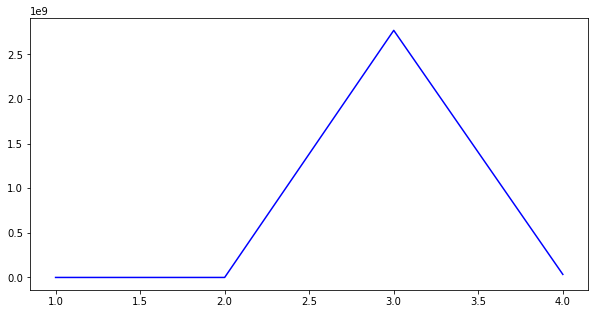

In [17]:
plt.plot(index,mse_arr,'b-')


In [19]:
#Ridge regression study over different hyper parameter values
stop = 11
folds=5
start=3
tot=start+stop+1        
val=np.logspace(-start,stop,num=tot)            #define range of hyper-parameter values
mse_arr=np.zeros(tot)
kf_arr=np.zeros(tot)
index=np.zeros(tot)
r2sc=np.zeros(tot)
threshold = 0.0        #All features taken
# loop over different hyperparameter values
for i in range(tot):
#     Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
    #correlated_data = correlated_data.drop(labels = ['RAD'], axis = 1)
    #correlated_data = correlated_data.drop(labels = ['TAX'], axis = 1)
    degree = 2       #Done for Second order Polynomial      
    index[i]=val[i]
   #Call ridge regresion function
    y_test, y_predict,mse_kf = get_y_predictkf_ridge_d(correlated_data,degree,folds,val[i])
   #Calculate cost function
    mse_arr[i]=mean_squared_error(y_test, y_predict)
    kf_arr[i]=mse_kf
    r2s=r2_score(y_test, y_predict)
    r2sc[i]=r2s

(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)


/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22107e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45858e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.52921e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.28017e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned

(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 104)
(104,)


Text(0.5, 1.0, 'Ridge Regression fit')

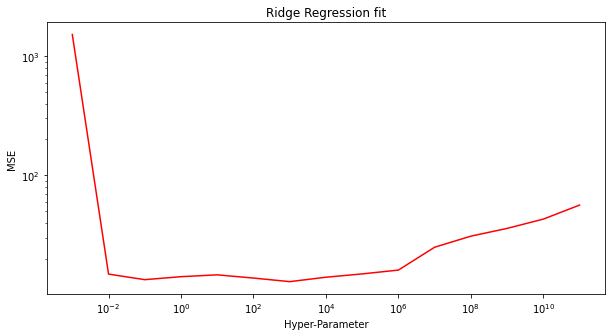

In [22]:
#plot MSE as a function of the complexity
plt.plot(index,mse_arr,'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hyper-Parameter')
plt.ylabel('MSE')
plt.title('Ridge Regression fit')

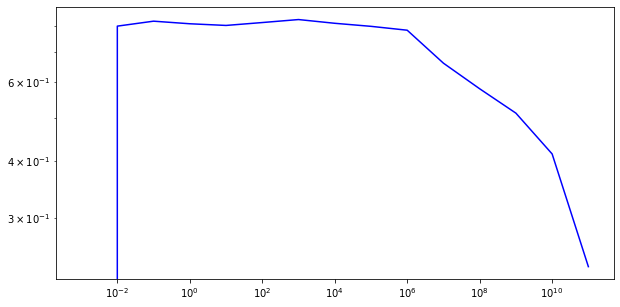

In [24]:
#plot R2 Score as a function of the complexity
plt.plot(index,r2sc,'b-')
plt.xscale('log')
plt.yscale('log')

In [27]:
# Study ridge Regression as a fucntion of the complexity
maxdegree = 5
mse_arr=np.zeros(maxdegree)
index=np.zeros(maxdegree)
r2sc=np.zeros(maxdegree)
kf_arr=np.zeros(maxdegree)
threshold = 0.0
# Obtain models for different complexity
for i in range(maxdegree):
    #k = i + 3
    #threshold = k/10
#     Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
   # print(correlated_data)
    degree = i+1
    index[i]=i+1
    y_test, y_predict,mse_kf = get_y_predictkf_ridge(correlated_data,degree,folds,600)
    #calculate cost function
    mse_arr[i]=mean_squared_error(y_test, y_predict)
    kf_arr[i]=mse_kf
    r2s=r2_score(y_test, y_predict)
    r2sc[i]=r2s

(506, 13) (506,)
(404, 13)
(506, 13) (506,)
(404, 104)
(506, 13) (506,)
(404, 559)
(506, 13)

/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.8791e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.63186e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.69784e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.93419e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: 

 (506,)
(404, 2379)


/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/sn

(506, 13) (506,)
(404, 8567)


/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/sn

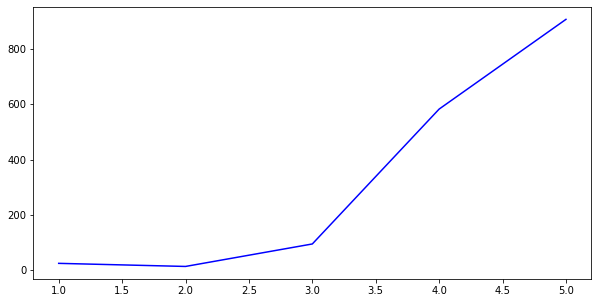

In [30]:
#plot MSE as a function of the complexity
plt.plot(index,mse_arr,'b-')

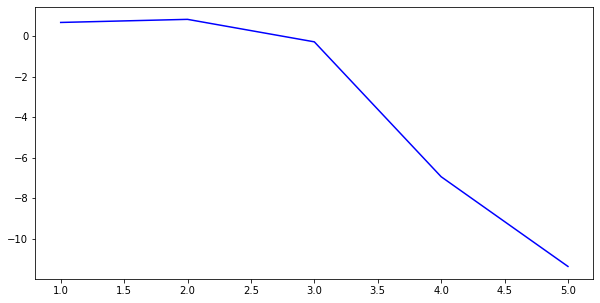

In [32]:
#plot R2 Score as a function of the complexity
plt.plot(index,r2sc,'b-')

In [37]:
#trying out Pseudoinverse for underdetermined case
maxdegree = 4
mse_arr=np.zeros(maxdegree)
index=np.zeros(maxdegree)
r2sc=np.zeros(maxdegree)
kf_arr=np.zeros(maxdegree)
threshold = 0.0
# Obtain models for different threshold
for i in range(maxdegree):
    #k = i + 3
    #threshold = k/10
#     Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
    #correlated_data = correlated_data.drop(labels = ['RAD'], axis = 1)
    #correlated_data = correlated_data.drop(labels = ['TAX'], axis = 1)
   # print(correlated_data)
    degree = i+1
    index[i]=i+1
    y_test, y_predict,mse_kf = get_y_predictkf_psinv(correlated_data,degree,folds,0.1)
    mse_arr[i]=mean_squared_error(y_test, y_predict)
    kf_arr[i]=mse_kf
    r2s=r2_score(y_test, y_predict)
    r2sc[i]=r2s

(506, 13) (506,)
(102, 13)
(13,)
(506, 13) (506,)
(102, 104)
(104,)
(506, 13) (506,)
(102, 559)
(559,)


/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/sn

(506, 13) (506,)
(102, 2379)
(2379,)


/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/snehankit/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/sn

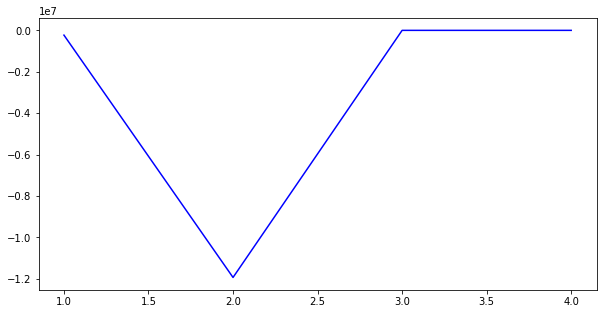

In [38]:
plt.plot(index,r2sc,'b-')

In [ ]:
#ridge regression with explicit definition of Derived parameters
maxdegree = 5
mse_arr=np.zeros(maxdegree)
index=np.zeros(maxdegree)
r2sc=np.zeros(maxdegree)
kf_arr=np.zeros(maxdegree)
threshold = 0.0
# Obtain models for different compplexity
for i in range(maxdegree):
    #k = i + 3
    #threshold = k/10
#     Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
    #correlated_data = correlated_data.drop(labels = ['RAD'], axis = 1)
    #correlated_data = correlated_data.drop(labels = ['TAX'], axis = 1)
   # print(correlated_data)
    degree = i+1
    index[i]=i+1
    y_test, y_predict,mse_kf = get_y_predictkf_ridge_d(correlated_data,degree,folds,600)
    mse_arr[i]=mean_squared_error(y_test, y_predict)
    kf_arr[i]=mse_kf
    r2s=r2_score(y_test, y_predict)
    r2sc[i]=r2s

In [ ]:
plt.plot(index,r2sc,'b-')

In [ ]:
threshold = 0
# Obtain models for different threshold
for i in range(8):
    k = i
    threshold = k/10
#     Call the getCorrelatedFeatures function to display the filtered features
    correlation_value, feature = getCorrelatedFeature(correlation_matrix['MEDV'], threshold)
    correlated_data = boston[correlation_value.index]
    #if 'RAD' in correlated_data.columns:
    #    correlated_data = correlated_data.drop(labels = ['RAD'], axis = 1)
    #if 'TAX' in correlated_data.columns:
    #    correlated_data = correlated_data.drop(labels = ['TAX'], axis = 1)
   # print(correlated_data)
    degree = 3
    y_test, y_predict,mse_kf = get_y_predictkf_ridge_d(correlated_data,degree,folds,1e8)
    

performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)    